In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, Lasso
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, f1_score, recall_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
# from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifierbz

Using TensorFlow backend.


In [4]:
from sklearn.externals.six import StringIO  
import pydot 

/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Central Limit Theorem

In [5]:
x=100*np.random.rand(1000)

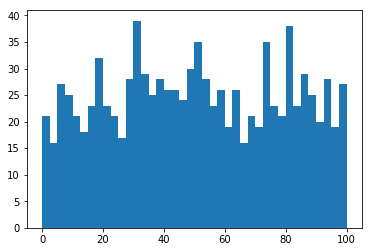

In [6]:
plt.hist(x,bins=40)
plt.show()

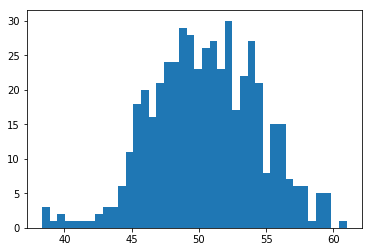

In [7]:
n=50
samples=500
means=[]
for j in range(samples):
    s=[]
    for i in range(n):
        s.append(random.choice(x))
    means.append(np.array(s).mean())

    
plt.hist(means,40)
plt.show()

In [8]:
np.array(means).mean()

50.50691026607024

In [9]:
np.array(means).std()

3.959604045285851

In [10]:
np.array(x).std()/np.sqrt(n)

3.987129164680919

In [11]:
zscore=(np.array(s).mean()-np.array(x).mean())/(np.array(x).std()/np.sqrt(n))
zscore

1.5297982175851255

In [12]:
tscore=(np.array(s).mean()-np.array(x).mean())/(np.array(s).std()/np.sqrt(n))
tscore

1.5065876465650145

In [13]:
from mpl_toolkits import mplot3d

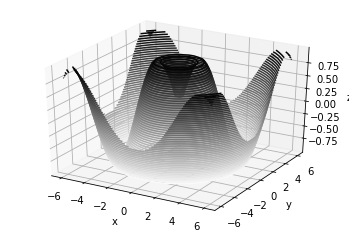

In [14]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [15]:
df=pd.read_csv('input/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
train=df.loc[:,['LotArea','SalePrice']]

In [44]:
def error(m, b, points):
    totalError = 0
    for i in range(0, points.shape[0]):
        totalError += (points.iloc[i].SalePrice - (m * points.iloc[i].LotArea + b)) ** 2
    return totalError / float(points.shape[0])

t0=np.arange(-100,100,1)
t1=np.arange(-100,100,1)


In [36]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [84]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=400,p=0.5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

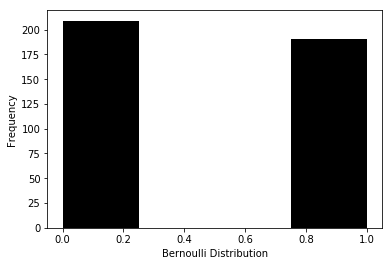

In [86]:
ax= sns.distplot(data_bern,
                 kde=False,
                 color="black",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

In [5]:
df=pd.read_csv('train_final.csv')
test=pd.read_csv('test_final.csv')
df.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,...,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,...,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,...,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,...,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,...,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,...,13836,142145,4673,1,128230,1,1,1,620,1


In [24]:
# Setting X as feature matrix and Y as label
X=df.iloc[:,2:]
Y=df.iloc[:,1]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=7)

In [7]:
def predict_model(model,X,Y, split,random_state=7, test_default=False):

    if test_default:
        print("default test")
        model.fit(X,Y)
        ypred=model.predict_proba(X_test.values)[:,1]
        auc_score=roc_auc_score(Y_test.values,ypred)
        print("Model Report: ", type(model).__name__, " - AUC : ",auc_score)
        print("acc: ",accuracy_score(Y_test.values,model.predict(X_test.values)))
        confmat=confusion_matrix(Y_test.values,model.predict(X_test.values))
        print("Confusion Matrix:\n",confmat,"\n\n")
    else:
        train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=split, random_state=random_state)
        model.fit(train_X,train_Y)        
        ypred=model.predict_proba(test_X)[:,1]
        auc_score=roc_auc_score(test_Y,ypred)
        
        print("Model Report: ", type(model).__name__, " - AUC : ",auc_score)
        print("acc: ",accuracy_score(test_Y,model.predict(test_X)))
        confmat=confusion_matrix(test_Y,model.predict(test_X))
        print("Confusion Matrix:\n",confmat,"\n\n")

In [25]:
lf=DecisionTreeClassifier(random_state=1)
lf.fit(X_train,Y_train)

dot_data = StringIO() 
export_graphviz(lf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("dtree_simple.pdf")
predict_model(lf,X,Y,0.2)

Model Report:  DecisionTreeClassifier  - AUC :  0.6709477929369078
acc:  0.9197436679890143
Confusion Matrix:
 [[  82  131]
 [ 132 2932]] 




In [8]:
rf=RandomForestClassifier(random_state=1)

rf.fit(X_train,Y_train)

for tree in rf.estimators_:
    dot_data1 = StringIO()
    export_graphviz(tree, out_file=dot_data1) 
    graph = pydot.graph_from_dot_data(dot_data1.getvalue()) 
    graph[0].write_pdf("rforest_simple"+str(tree.random_state)+".pdf")
    predict_model(tree,X,Y,0.2)

/Users/subhayuchakravarty/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Model Report:  DecisionTreeClassifier  - AUC :  0.6086094460584219
acc:  0.909368324687214
Confusion Matrix:
 [[  56  157]
 [ 140 2924]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.6480259932090366
acc:  0.9136405248703082
Confusion Matrix:
 [[  73  140]
 [ 143 2921]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.6551057870285246
acc:  0.9227952395483674
Confusion Matrix:
 [[  74  139]
 [ 114 2950]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.5958932445850035
acc:  0.9060115959719255
Confusion Matrix:
 [[  51  162]
 [ 146 2918]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.663905539415781
acc:  0.9188281965212084
Confusion Matrix:
 [[  79  134]
 [ 132 2932]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.5971987276137241
acc:  0.9084528532194079
Confusion Matrix:
 [[  51  162]
 [ 138 2926]] 


Model Report:  DecisionTreeClassifier  - AUC :  0.6051825531080303
acc:  0.9029600244125725
Confusion Matrix:
 [[  56  157]
 [ 161 2903]] 


Model Report:  